# Imports and About

Import the needed packages for plotting and setup Matplotlib for inline plotting. This Jupyter notebook is used to summarized the data from the PAME experiments script (`pame-experiments.sh`) and statistical hypothesis tests for improvements. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from scipy.stats import f
from scipy.stats import norm

/Users/gditzler/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Plotters

Load and plot the data from the MOA csv files. Provide a plot for each data set with each of the classification algorithms and build a matrix with the averaged accuracies, which will be used for testing for statistical improvements to the accuracy of a classifier. All of the plots are saved to the `plots/` directory as a `pdf`. 


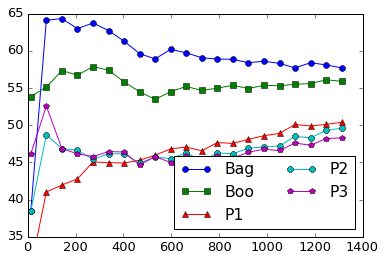

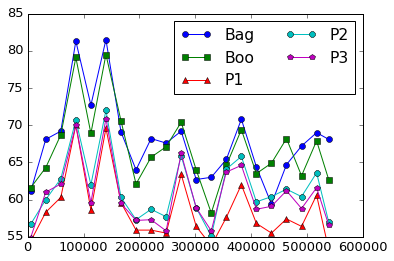

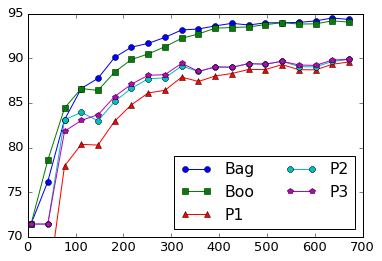

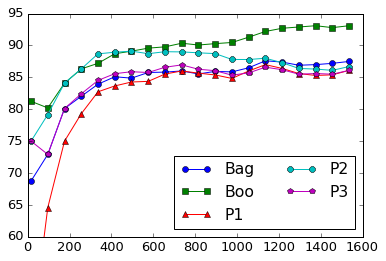

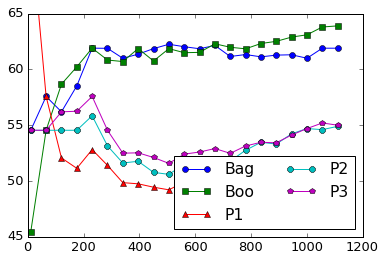

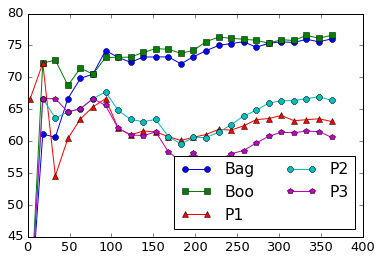

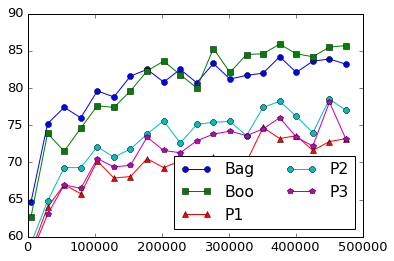

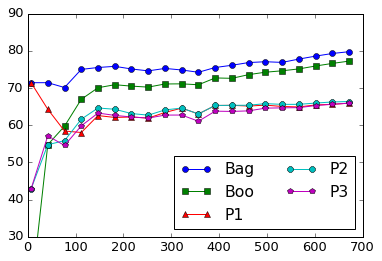

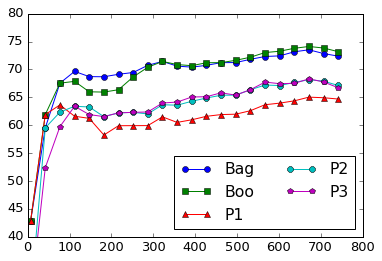

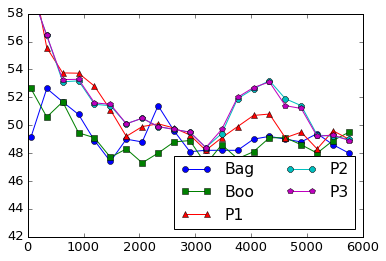

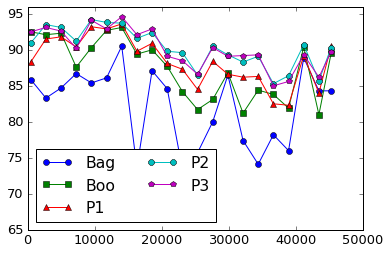

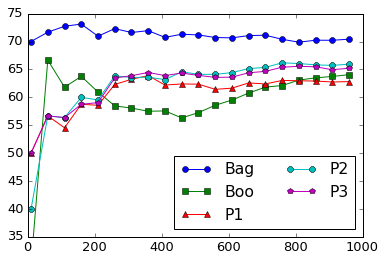

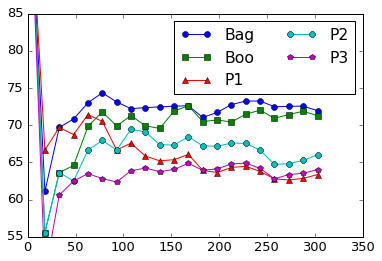

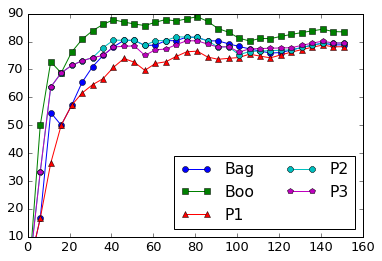

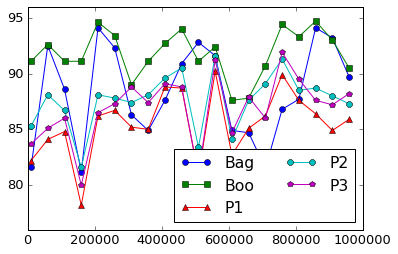

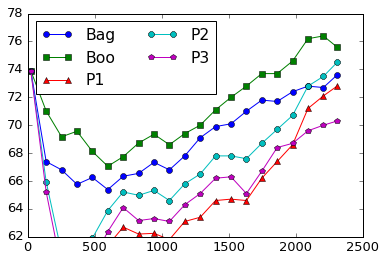

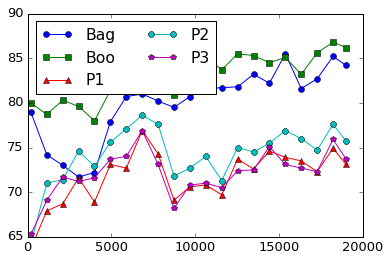

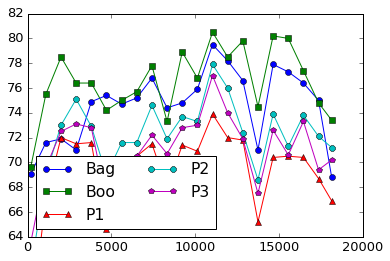

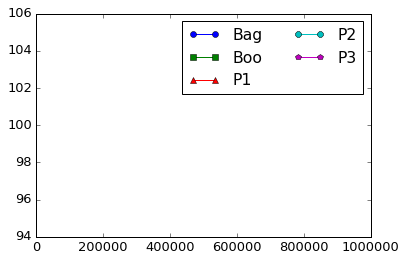

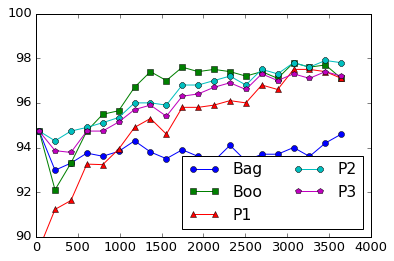

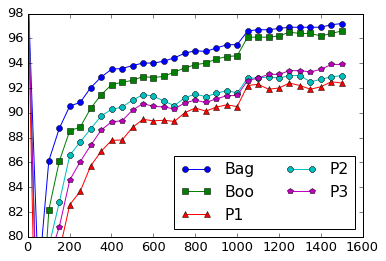

In [14]:
pth = 'outputs/'
base = 'hoeff'
#algs = [base, 'bagging-'+base, 'boosting-'+base, 
#        'pame1-bag-'+base, 'pame2-bag-'+base, 'pame3-bag-'+base, 
#        'pame1-boo-'+base, 'pame2-boo-'+base, 'pame3-boo-'+base]
algs = ['bagging-'+base, 'boosting-'+base, 
        'pame1-boo-'+base, 'pame2-boo-'+base, 'pame3-boo-'+base]

# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
F = 'classifications correct (percent)'
TZ = 'model cost (RAM-Hours)'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D', '+', '*', 'x']
ln = []
lims = [[35,65], [55,85], [70,95], [60,95], [45,65], [45,80], [60,90], [30,90], [40,80], 
        [42,58], [65,96], [35,75], [55,85], [10,90], [76,96], [62,78], [65,90], [64,82],
        [94,106], [90,100], [80,98], [75,100]]


accs = np.zeros((ndatas, nalg))
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    z = lims[j]
    plt.figure()
    #print "Running datas " + datas[j]
    for i in range(nalg):
        #print "   -- " + algs[i]
        #results-car_v2-pame1-hoeff.csv
        if datas[j] == 'splice_v2':
            nsep = 50
        else:
            nsep = 5
        #print pth+'results-'+datas[j]+'-'+algs[i]+'.csv'
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        t = range(0, len(df[T]), nsep)
        plt.plot(df[T][t], df[F][t], marker=mrk[i])
        accs[j, i] = df[F].mean()
        mdlcst[j, i] = df[TZ].mean()
    
    
    plt.ylim(z[0],z[1])
    #plt.legend(["Hoeff", "Bag", "Boo", "P1", "P2", "P3"], ncol=2, loc='best')
    plt.legend(["Bag", "Boo", "P1", "P2", "P3"], ncol=2, loc='best')
    font = {'size'   : 13}
    plt.rc('font', **font)
    plt.savefig('plots/results-'+datas[j]+'-'+base+'-error.pdf', format='pdf')


In [ ]:
pth = 'outputs/'
base = 'hoeff'
algs = [base, 'bagging-'+base, 'boosting-'+base, 'pame1-'+base, 'pame2-'+base, 'pame3-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
TZ = 'model cost (RAM-Hours)'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D']
ln = []
lims = [[35,65], [55,85], [70,95], [60,95], [45,65], [45,80], [60,90], [30,90], [40,80], 
        [42,58], [65,96], [35,75], [55,85], [10,90], [76,96], [62,78], [65,90], [64,82],
        [94,106], [70,95], [92,98], [75,100]]


for j in range(ndatas):
    z = lims[j]
    plt.figure()
    #print "Running datas " + datas[j]
    for i in range(nalg):
        #print "   -- " + algs[i]
        #results-car_v2-pame1-hoeff.csv
        if datas[j] == 'splice_v2':
            nsep = 50
        else:
            nsep = 5
                
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        t = range(0, len(df[T]), nsep)
        plt.plot(df[T][t], df[TZ][t], marker=mrk[i])    
    
    #plt.ylim(z[0],z[1])
    plt.legend(["Hoeff", "Bag", "Boo", "P1", "P2", "P3"], ncol=2, loc='best')
    font = {'size'   : 13}
    plt.rc('font', **font)
    plt.savefig('plots/results-'+datas[j]+'-'+base+'-model-cost.pdf', format='pdf')


In [ ]:
pth = 'outputs/'
base = 'hoeff'
algs = ['pame1-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
F = 'negative weights'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D']
ln = []
lims = [[35,65], [55,85], [70,95], [60,95], [45,65], [45,80], [60,90], [30,90], [40,80], 
        [42,58], [65,96], [35,75], [55,85], [10,90], [76,96], [62,78], [65,90], [64,82],
        [94,106], [70,95], [92,98], [75,100]]


accs = np.zeros((ndatas, nalg))
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    z = lims[j]
    plt.figure()
    #print "Running datas " + datas[j]
    for i in range(nalg):
        #print "   -- " + algs[i]
        #results-car_v2-pame1-hoeff.csv
        if datas[j] == 'splice_v2':
            nsep = 50
        else:
            nsep = 5
                
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        t = range(0, len(df[T]), nsep)
        plt.plot(df[T][t], df[F][t], marker=mrk[i])
        accs[j, i] = df[F].mean()
        mdlcst[j, i] = df[TZ].mean()
    
    
    #plt.ylim(z[0],z[1])
    plt.legend(["PAME-1"], loc='best')
    font = {'size'   : 13}
    plt.rc('font', **font)
    plt.savefig('plots/results-'+datas[j]+'-'+base+'nweights.pdf', format='pdf')


# Statistical Hypothesis Testing

Apply the Friedman test and Bonferroni-Dunn test as described by Janez Demsar. 

In [15]:
pth = 'outputs/'
base = 'hoeff'
#algs = [base, 'bagging-'+base, 'boosting-'+base, 'pame1-'+base, 'pame2-'+base, 'pame3-'+base]
#algs = [base, 'bagging-'+base, 'boosting-'+base, 
#        'pame1-bag-'+base, 'pame2-bag-'+base, 'pame3-bag-'+base, 
#        'pame1-boo-'+base, 'pame2-boo-'+base, 'pame3-boo-'+base]
algs = ['bagging-'+base, 'boosting-'+base, 
        'pame1-boo-'+base, 'pame2-boo-'+base, 'pame3-boo-'+base]

# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
F = 'classifications correct (percent)'  # Kappa Statistic (percent)   classifications correct (percent)  

accs = np.zeros((ndatas, nalg))
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    for i in range(nalg):
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        accs[j, i] = df[F].mean()

Z = np.zeros((nalg, nalg))
ranks = np.zeros((ndatas, nalg))
for i in range(ndatas):
    ss = np.argsort(accs[i])
    for m, n in map(None, range(nalg), ss):
        ranks[i, n] = nalg - m
    #ranks[i] = nalg-rs[np.argsort(accs[i])]
R = ranks.mean(axis=0)

# chi-squared stat
XF = 12*ndatas/(nalg*(nalg+1)) * ((R**2).sum() - (nalg*(nalg+1)**2)/4)
FF = (ndatas-1)*XF/(ndatas*(nalg-1)-XF)


pF = 1 - f.cdf(FF, nalg-1, (nalg-1)*(ndatas-1))
if pF < 0.05: 
    print "Friedman: Reject the Null Hypothesis (" + str(pF) + ")"
else:
    print "Friedman: Fail to Reject the Null Hypothesis (" + str(pF) + ")"
print " "        

for i in range(nalg):
    for j in range(nalg):
        Z[i,j] = (R[i]-R[j])/(np.sqrt(1.*(nalg*(nalg+1))/(6*ndatas)))

        
s = ' & '
for alg in algs: 
    s += alg + ' & '
print s

for j in range(ndatas):
    s = datas[j] + ' & '
    for i in range(nalg-1):
        s += str(np.round(1000*accs[j,i])/1000) + ' (' + str(ranks[j,i]) + ') & '
    s += str(np.round(1000*accs[j,nalg-1])/1000) + ' (' + str(ranks[j,nalg-1]) + ') \\\\'
    print s
s = ' & '
for i in range(nalg-1):
    s += str(np.round(100*R[i])/100) + ' & '
s += str(np.round(100*R[nalg-1])/100) + ' \\\\ '
print s

Friedman: Reject the Null Hypothesis (2.80608092318e-10)
 
 & bagging-hoeff & boosting-hoeff & pame1-boo-hoeff & pame2-boo-hoeff & pame3-boo-hoeff & 
abalone_v2 & 59.796 (1.0) & 55.464 (2.0) & 46.22 (5.0) & 46.871 (3.0) & 46.776 (4.0) \\
airlines & 68.329 (1.0) & 66.725 (2.0) & 58.152 (5.0) & 61.477 (3.0) & 60.803 (4.0) \\
breast-w & 90.621 (1.0) & 90.287 (2.0) & 84.082 (5.0) & 86.333 (4.0) & 86.372 (3.0) \\
car_v2 & 84.546 (3.0) & 89.373 (1.0) & 82.457 (5.0) & 86.835 (2.0) & 84.424 (4.0) \\
cmc_v2 & 60.934 (2.0) & 61.306 (1.0) & 51.516 (5.0) & 53.309 (4.0) & 53.998 (3.0) \\
colic & 71.742 (2.0) & 73.631 (1.0) & 62.907 (4.0) & 63.803 (3.0) & 61.059 (5.0) \\
cov_v2 & 80.249 (2.0) & 80.722 (1.0) & 70.069 (5.0) & 73.655 (3.0) & 71.537 (4.0) \\
credit-a & 75.539 (1.0) & 69.727 (2.0) & 63.744 (3.0) & 63.312 (4.0) & 62.183 (5.0) \\
diabetes & 69.336 (2.0) & 69.539 (1.0) & 61.482 (5.0) & 63.649 (3.0) & 63.11 (4.0) \\
dow & 49.494 (4.0) & 49.061 (5.0) & 50.492 (3.0) & 51.249 (2.0) & 51.26 (1.0

In [ ]:
pth = 'outputs/'
base = 'hoeff'
algs = [base, 'bagging-'+base, 'boosting-'+base, 'pame1-'+base, 'pame2-'+base, 'pame3-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
F = 'model cost (RAM-Hours)'
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    for i in range(nalg):
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        mdlcst[j, i] = df[F].mean()
        
Z = np.zeros((nalg, nalg))
ranks = np.zeros((ndatas, nalg))
for i in range(ndatas):
    ss = np.argsort(accs[i])
    for m, n in map(None, range(nalg), ss):
        ranks[i, n] = 1 + m
R = ranks.mean(axis=0)

# chi-squared stat
XF = 12*ndatas/(nalg*(nalg+1)) * ((R**2).sum() - (nalg*(nalg+1)**2)/4)
FF = (ndatas-1)*XF/(ndatas*(nalg-1)-XF)

pF = 1 - f.cdf(FF, nalg-1, (nalg-1)*(ndatas-1))
if pF < 0.05: 
    print "Friedman: Reject the Null Hypothesis"
else:
    print "Friedman: Fail to Reject the Null Hypothesis"
print " "        


for i in range(nalg):
    for j in range(nalg):
        Z[i,j] = (R[i]-R[j])/(np.sqrt(1.*(nalg*(nalg+1))/(6*ndatas)))
        
for j in range(ndatas):
    s = datas[j] + ' & '
    for i in range(nalg-1):
        s += str(100000000*mdlcst[j,i]) + ' (' + str(ranks[j,i]) + ') & '
    s += str(mdlcst[j,nalg-1]) + ' (' + str(ranks[j,nalg-1]) + ') \\\\'
    print s
s = ' & '
for i in range(nalg-1):
    s += str(np.round(100*R[i])/100) + ' & '
s += str(np.round(100*R[nalg-1])/100) + ' \\\\ '
print s

In [ ]:
for j in range(ndatas):
    s = datas[j] + ' & '
    for i in range(nalg-1):
        s += str(np.round(1000*accs[j,i])/1000) + ' (' + str(ranks[j,i]) + ') & '
    s += str(np.round(1000*accs[j,nalg-1])/1000) + ' (' + str(ranks[j,nalg-1]) + ') \\\\'
    print s
s = ' & '
for i in range(nalg-1):
    s += str(np.round(100*R[i])/100) + ' & '
s += str(np.round(100*R[nalg-1])/100) + ' \\\\ '
print s

In [ ]:
df = pd.read_csv('outputs/kl-elec.csv')
out = plt.hist(df['KL-div'], 20)
plt.xlabel('KL-divergence')
plt.ylabel('Relative Frequency')
font = {'size'   : 13}
plt.rc('font', **font)
plt.savefig('plots/kl-elec.pdf', format='pdf')

plt.figure()
df = pd.read_csv('outputs/kl-abalone.csv')
out = plt.hist(df['KL-div'], 20)
plt.xlabel('KL-divergence')
plt.ylabel('Relative Frequency')
font = {'size'   : 13}
plt.rc('font', **font)
plt.savefig('plots/kl-abalone.pdf', format='pdf')


In [7]:
df

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),classified instances,classifications correct (percent),Kappa Statistic (percent),model training instances,model serialized size (bytes),ensemble size,negative weights
0,1,0.040033,1.704945e-09,1,100.000000,?,1,164624,10,0
1,2,0.065706,2.860646e-09,2,50.000000,0.0,2,174008,10,0
2,3,0.092822,4.249441e-09,3,33.333333,0.0,3,197976,10,0
3,4,0.117916,5.781851e-09,4,50.000000,0.0,4,236056,10,0
4,5,0.129434,6.516081e-09,5,60.000000,28.57142857142856,5,246408,10,0
5,6,0.140747,7.249512e-09,6,66.666667,40.0,6,250608,10,0
6,7,0.156440,8.318237e-09,7,57.142857,27.58620689655172,7,263248,10,0
7,8,0.167768,9.110990e-09,8,50.000000,5.88235294117647,8,270512,10,0
8,9,0.178789,9.884265e-09,9,44.444444,0.0,9,271200,10,0
9,10,0.188305,1.055354e-08,10,50.000000,7.407407407407414,10,271872,10,0
